In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.listdir('/content/drive/MyDrive/CNN/cats'))

['cat.165.jpg', 'cat.5.jpg', 'cat.201.jpg', 'cat.19.jpg', 'cat.98.jpg', 'cat.52.jpg', 'cat.42.jpg', 'cat.152.jpg', 'cat.121.jpg', 'cat.184.jpg', 'cat.133.jpg', 'cat.122.jpg', 'cat.72.jpg', 'cat.55.jpg', 'cat.78.jpg', 'cat.61.jpg', 'cat.80.jpg', 'cat.127.jpg', 'cat.23.jpg', 'cat.93.jpg', 'cat.88.jpg', 'cat.34.jpg', 'cat.70.jpg', 'cat.169.jpg', 'cat.36.jpg', 'cat.44.jpg', 'cat.68.jpg', 'cat.16.jpg', 'cat.86.jpg', 'cat.27.jpg', 'cat.135.jpg', 'cat.145.jpg', 'cat.33.jpg', 'cat.200.jpg', 'cat.171.jpg', 'cat.53.jpg', 'cat.156.jpg', 'cat.177.jpg', 'cat.20.jpg', 'cat.167.jpg', 'cat.3.jpg', 'cat.129.jpg', 'cat.159.jpg', 'cat.146.jpg', 'cat.144.jpg', 'cat.143.jpg', 'cat.87.jpg', 'cat.157.jpg', 'cat.6.jpg', 'cat.178.jpg', 'cat.170.jpg', 'cat.134.jpg', 'cat.119.jpg', 'cat.13.jpg', 'cat.62.jpg', 'cat.189.jpg', 'cat.12.jpg', 'cat.95.jpg', 'cat.186.jpg', 'cat.192.jpg', 'cat.48.jpg', 'cat.66.jpg', 'cat.166.jpg', 'cat.2.jpg', 'cat.172.jpg', 'cat.75.jpg', 'cat.198.jpg', 'cat.111.jpg', 'cat.117.jpg', 'ca

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
folders = os.listdir('/content/drive/MyDrive/CNN')

In [5]:
folders

['cats', 'dogs', 'horses', 'humans']

In [6]:
path = '/content/drive/MyDrive/CNN/'
for i in folders:
  print(i, len(os.listdir(path+i)))

cats 181
dogs 181
horses 181
humans 181


In [7]:
from tensorflow.keras.preprocessing import image

In [8]:
sample_image = '/content/drive/MyDrive/CNN/cats/cat.5.jpg'
img = image.load_img(sample_image)

In [9]:
img = image.img_to_array(img)/255

In [10]:
img.shape

(144, 175, 3)

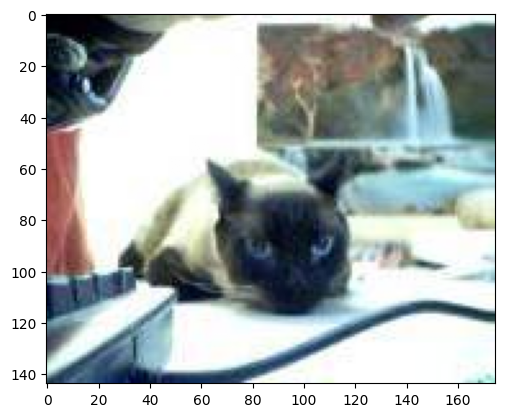

In [11]:
plt.imshow(img)

In [12]:
import keras
import keras.layers as layers
from keras.models import Sequential

In [13]:
input_shape = (250, 250, 3)
num_classes = 4

In [14]:
model = keras.Sequential(
[
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 247, 247, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 128)      0

In [16]:
from keras import optimizers

In [17]:
model.compile(optimizer = 'Adam', loss="categorical_crossentropy", metrics = ['accuracy'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

valid_set = ImageDataGenerator(rescale=1/255)

In [20]:
train_gen = train_set.flow_from_directory(path,
                                         target_size = (250, 250),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [21]:
val_path = '/content/drive/MyDrive/Val_Dataset'
val_generator = valid_set.flow_from_directory(
    val_path,
    target_size = (250, 250),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 84 images belonging to 4 classes.


In [22]:
for i, j in train_gen:
  print(i.shape, j.shape)
  break

(32, 250, 250, 3) (32, 4)


In [23]:
for i, j in val_generator:
  print(i.shape, j.shape)
  break

(32, 250, 250, 3) (32, 4)


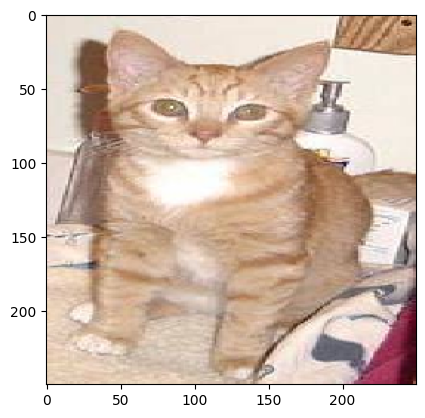

In [24]:
plt.imshow(i[15])
plt.show()

In [25]:
hist = model.fit_generator(train_gen, epochs = 20, validation_data = val_generator)

<ipython-input-25-61f8515eb13a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 20, validation_data = val_generator)


Epoch 1/20
23/23 [==============================] - 530s 23s/step - loss: 3.1514 - accuracy: 0.2983 - val_loss: 1.2659 - val_accuracy: 0.3690
Epoch 2/20
23/23 [==============================] - 517s 23s/step - loss: 1.3135 - accuracy: 0.3384 - val_loss: 1.1557 - val_accuracy: 0.5952
Epoch 3/20
23/23 [==============================] - 510s 22s/step - loss: 1.2226 - accuracy: 0.4351 - val_loss: 1.1852 - val_accuracy: 0.5357
Epoch 4/20
23/23 [==============================] - 519s 23s/step - loss: 1.1494 - accuracy: 0.5180 - val_loss: 1.0818 - val_accuracy: 0.5833
Epoch 5/20
23/23 [==============================] - 507s 22s/step - loss: 1.0856 - accuracy: 0.5304 - val_loss: 1.0519 - val_accuracy: 0.5238
Epoch 6/20
23/23 [==============================] - 511s 22s/step - loss: 1.0487 - accuracy: 0.5511 - val_loss: 0.9071 - val_accuracy: 0.6429
Epoch 7/20
23/23 [==============================] - 513s 22s/step - loss: 1.0026 - accuracy: 0.5691 - val_loss: 0.8829 - val_accuracy: 0.6190
Epoch 

In [26]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

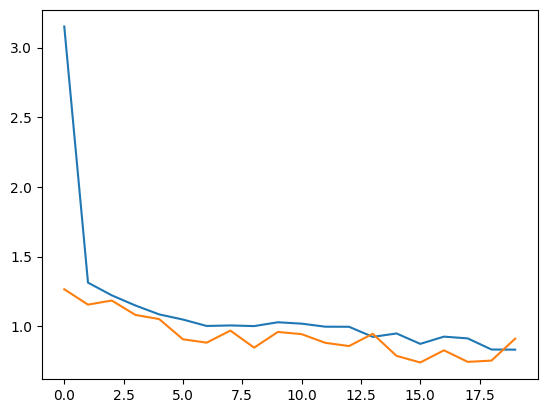

In [28]:
plt.plot(loss)
plt.plot(val_loss)